In [1]:
%load_ext autoreload  
%autoreload 2  

In [2]:
from ocpy.data import Data
from ocpy.oc import Linear, Parameter, Quadratic, Keplerian
# (OC_LMFit, OC ve diğerleri zaten ocpy içinde)

# 1) Veri → OC (cycles ve oc kolonları hazır)
data = Data.from_file("xy_boo.xlsx").fill_errors(0.003, override=True).calculate_weights()
oc = data.calculate_oc(reference_minimum=2439954.025, reference_period=0.370564, model_type="pymc")
oc = oc[oc["labels"] != "vis"]

# 2) Lineer model (y = a*x + b), başlangıç değerleri Parameter(dataclass)
lin = Linear(
    a = 0,
    b = 0
)



In [3]:
type(oc)

ocpy.oc_pymc.OCPyMC

In [4]:
# 3) Fit ve çizim
# res = oc.fit([lin], draws=2000, tune=2000, chains=4, progressbar=True, target_accept=.97)         

In [5]:
# oc.fit_and_report(res, title="Linear Fit (a·x+b)")

In [6]:
# oc.create_corner_plot(res)

In [7]:
# from ocpy.oc import Quadratic, Parameter

# # y = q * (cycles)^2
# quad = Quadratic(
#     q = Parameter(value=-0, fixed=False),
# )

# res_q = oc.fit([quad])
# oc.fit_and_report(res_q, title="Quadratic Fit (q·x²)")

In [8]:
# from ocpy.oc import Keplerian, Parameter
# import numpy as np

# # LiTE: Δt = K[(cosE - e)sinω + sqrt(1-e^2) sinE cosω], ω derece (model içinde rad'a çevriliyor)
# kep = Keplerian(
#     amp=   Parameter(value=1e-4, min=0.0),           # genelde küçük genlik
#     e=     Parameter(value=0.1,  min=0.0, max=0.9),  # dışmerkezlik
#     omega= Parameter(value=0.0),                     # derece
#     P=     Parameter(value=70000.0, min=1.0),         # dönem (cycles biriminde)
#     T0=    Parameter(value=float(np.nanmedian(oc.data["minimum_time"]))),  # başlangıç fazı için kaba tahmin
# )

# res_k = oc.fit([kep], progressbar=True, threads=20)
# oc.fit_and_report(res_k, title="Keplerian LiTE Fit")

In [9]:
# oc.create_corner_plot(res_k)

In [10]:
lin = Linear(
    a=Parameter(value=-1.050761e-05, std=2e-5,  min=-1e-3,  max=1e-3),
    b=Parameter(value= 1.319242e-03, std=2e-3,  min=-0.1,   max=0.1),
)
quad = Quadratic(
    q=Parameter(value= 1.977678e-10, std=5e-10, min=-1e-8,  max=1e-8),
)
kep = Keplerian(
    amp   = Parameter(value=0.06, std=0.02, min=0.0,  max=0.15),
    e     = Parameter(value=0.45, std=0.15, min=0.0,  max=0.95),
    omega = Parameter(value=75.0,          min=0.0,  max=360.0),
    P     = Parameter(value=72000, std=5000, min=50000, max=120000),
    T0    = Parameter(value=41150, std=3000),
)


Initializing NUTS using jitter+adapt_diag...
c:\Users\Bar1\anaconda3\envs\ocpy\Lib\site-packages\pytensor\link\c\cmodule.py:2986: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [linear1_a, linear1_b, quadratic2_q, keplerian3_amp, keplerian3_e, keplerian3_omega, keplerian3_P, keplerian3_T0]


Output()

Sampling 4 chains for 5_000 tune and 3_000 draw iterations (20_000 + 12_000 draws total) took 595 seconds.


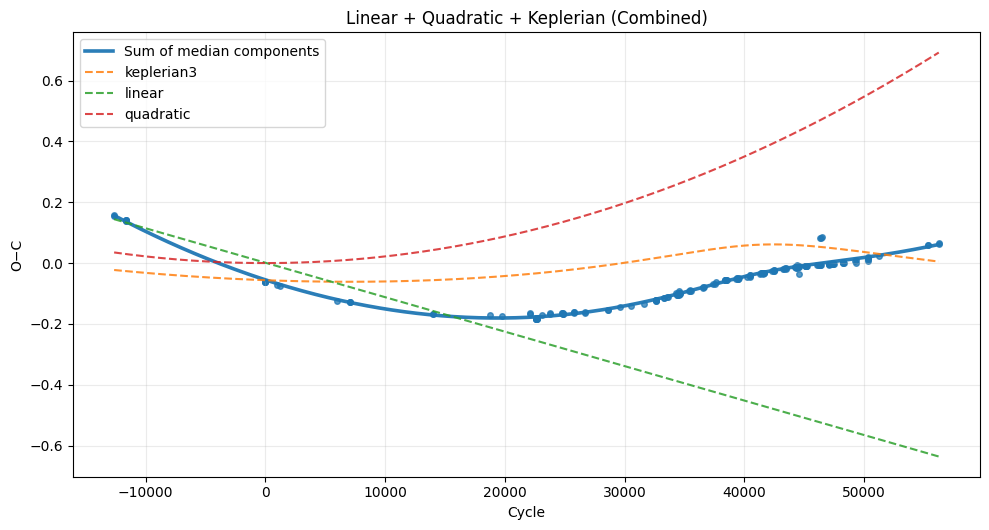

In [11]:
res_all = oc.fit([lin, quad, kep], progressbar=True, target_accept=.95, draws=3000, tune=5000, chains=4)
oc.fit_and_report(res_all, title="Linear + Quadratic + Keplerian (Combined)")

array([[<Axes: ylabel='keplerian3_T0'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='linear1_a'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='linear1_b'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='quadratic2_q'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='keplerian3_amp'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='keplerian3_e'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='keplerian3_omega'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='keplerian3_T0', ylabel='keplerian3_P'>,
        <Axes: xlabel='linear1_a'>, <Axes: xlabel='linear1_b'>,
        <Axes: xlabel='quadratic2_q'>, <Axes: 

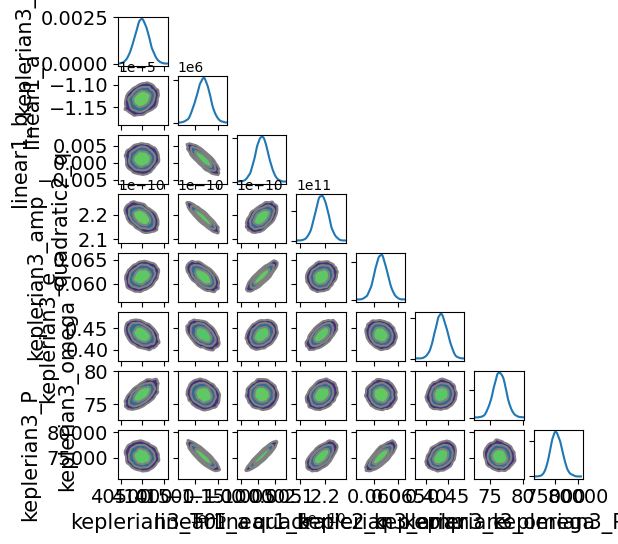

In [12]:
oc.create_corner_plot(res_all, method="corner")

In [13]:
type(oc)

ocpy.oc_pymc.OCPyMC

<Figure size 1200x800 with 0 Axes>

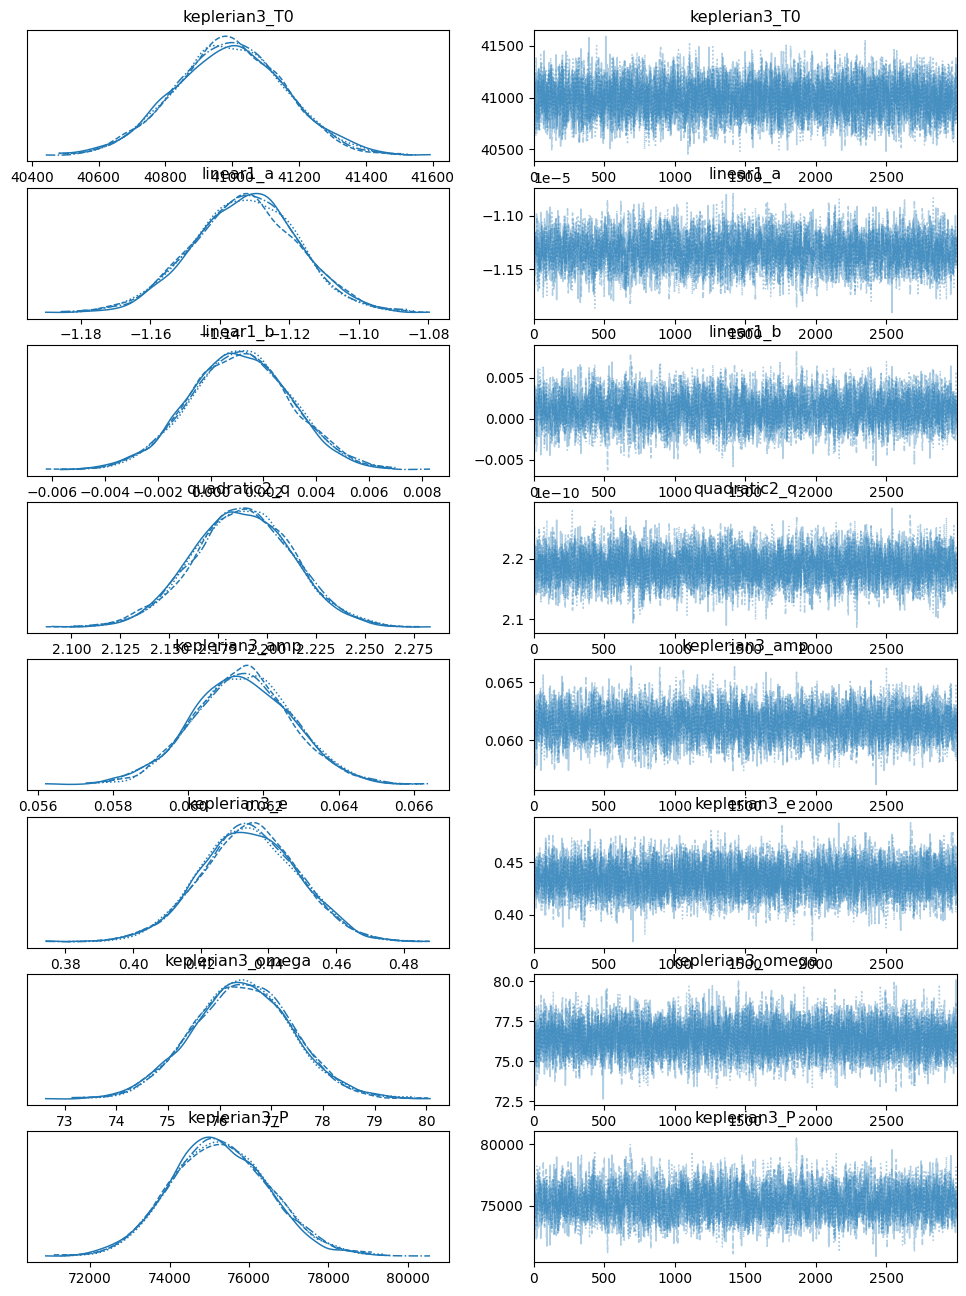

<Figure size 1200x800 with 0 Axes>

In [14]:
oc.create_trace_plot(res_all)